<a href="https://colab.research.google.com/github/emisoft-designs/Data-Science-Practice-Projects/blob/main/CSO_and_Labour_Migration_in_Nigeria_The_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, files
from oauth2client.client import GoogleCredentials

# supporting dependencies
import pandas as pd
import numpy as np

In [2]:
# Authorization
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## **IMPORT DATA**

In [3]:
def gload_CSV(link_id1, dir1, link_id2='', dir2=''):
  d1 = None
  d2 = None
  d1 = drive.CreateFile({'id':link_id1})
  d1.GetContentFile(dir1)
  #
  if link_id2 != '' and dir2 != '':
    d2 = drive.CreateFile({'id':link_id2})
    d2.GetContentFile(dir2)

In [4]:
link_id = '1ao-SW8MBrtyL5tmwE_YmkKqrBe8zu9jd'
dir = '/content/drive/MyDrive/Colab Notebooks/Analysis Lab/LabourMigrationCSOs/files/CSO Labour Migration Governance in Nigeria (Responses) - Form Responses 1.csv'

In [5]:
csv = gload_CSV(link_id,dir)
data = pd.read_csv(dir)
data.head(1)

,Timestamp,"If you concede to the above, would you like to proceed?",1.0 What is the name of your Organization?,1.1 What is the location of the organization's headquarters?,1.2 Background,1.3 What are the primary areas of focus of your organization?,"1.4 Is your organization a member of any working group representing the national migration, trade union and other labour migration governance structures in Nigeria?","1.4.1 If Yes to the above, what working group?","1.4.2 If yes to question 1.4, from a scale of 1 to 10 how has the membership impacted your work?",i. Do you have adequate knowledge of international and national labour migration principles and guidelines?,...,iii.\t(If any) state the direct or indirect impact of any labour migration governance advocacy activity carried out,"iv.\tState any activity you know on labour migration governance, that the government or trade union, employers or international partners have contributed to the protection and promotion of migrants rights",i.\tWhat challenges does your organization have with promoting migrant workers’ rights?,i.\tKindly suggest 2 actions that could be taken to promote fair recruitment nationally,ii.\tWhat area(s) would you want your organization’s capacity to be built to effectively engage in activities promoting labour migration governance?,i.\tDo state and non-state actors collaborate to achieve labour migration goals?,"ii.\tIf No to the above, what are the possible reasons for not collaborating",iii.\tIn what areas of labour migration do state and non-state actors collaborate to achieve goals?,iv.\tHow would you rate CSOs involvement and contribution to labour migration governance?,v.\tWhat can CSOs do better?
0,7/18/2022 23:16:42,Yes,Patriotic Citizen Initiatives,Lagos and Benin,CSO,"Migration, Human rights, Governance/Development",Yes,Technical Working Group (TWG) of the National ...,10.0,Yes,...,Carried out media advocacy on the ill treatmen...,ILO Supported the Federal Government of Nigeri...,"Capacity gap, Inadequate resources","Improving laws, policies and enforcement to p...","Fair recruitment and the entire processes, Pro...",Sometimes (Mixed),NaN,NaN,Fair,Collaborate more with each other and other sta...


In [6]:
columns_name = (['timestamp','conceded','organization','office','background','primary_area',
                 'Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14',
                 'Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26'])
data.columns = columns_name

# **FUNCTIONS**

In [7]:
def merge_df(var=[], index=False):
  df = pd.concat(var, axis=1)
  if index: df.reset_index(inplace=True)  # reset index
  return df

In [8]:
def save(df,name=''):
  success = df.to_csv('/content/drive/MyDrive/Colab Notebooks/Analysis Lab/LabourMigrationCSOs/result/{}_Summary.csv'.format(name))
  print('Successfully saved')


In [9]:
def clean(label,series):
  d = ','.join(str(x) for x in series)
  ds = pd.Series([x.strip().replace(';',',') for x in d.split(',')]) # clean series
  df = pd.DataFrame(ds.value_counts()) # create _dataframe
  df.reset_index(inplace=True)  # reset index
  df.columns=[series.name, label] # rename column
  df = df[df[series.name].notna()]
  df = df[df[series.name] != 'nan']
  df.set_index([series.name], inplace=True, drop=True)
  return df


In [10]:
def custom_create(df,col,labels=[],filename='', index=False, transpose=False):
  dfs= [clean(labels[x], df[x][col]) for x in range(0, len(df))]
  res = merge_df(dfs, index)
  res = res.replace(np.nan,'0') # you could remove the assignment and use 'inplace = True' instead
  if transpose: res = res.transpose()
  save(res,filename)
  return res

In [11]:
def generate(df=[], filter='', series=[], selections=[], index=True, transpose=False):
  res = []
  if transpose: index = False

  if len(series) > 1:
    for v in series: 
      dfls = [df[i][[filter,v]] for i in range(0, len(df))]
      val = custom_create(df=dfls, col=v, labels=selections, filename=v, index= index, transpose= transpose)
      res.append(val)
    return res
  else:
    dfls = [df[i][[filter,series[0]]] for i in range(0, len(df))]
    val = custom_create(df=dfls, col=series[0], labels=selections, filename=series[0], index=index, transpose= transpose)
    return val

In [12]:
questions = ['primary_area','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13',
             'Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25',
             'Q26']

## **BACKGROUND**

In [13]:
_df = data[data['background'].notna()]
_df.head(1)

,timestamp,conceded,organization,office,background,primary_area,Q1,Q2,Q3,Q4,...,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
0,7/18/2022 23:16:42,Yes,Patriotic Citizen Initiatives,Lagos and Benin,CSO,"Migration, Human rights, Governance/Development",Yes,Technical Working Group (TWG) of the National ...,10.0,Yes,...,Carried out media advocacy on the ill treatmen...,ILO Supported the Federal Government of Nigeri...,"Capacity gap, Inadequate resources","Improving laws, policies and enforcement to p...","Fair recruitment and the entire processes, Pro...",Sometimes (Mixed),NaN,NaN,Fair,Collaborate more with each other and other sta...


In [14]:
_df.background.unique()

array(['CSO', 'NGO'], dtype=object)

In [15]:
cso_df = _df[_df['background'].str.contains('CSO')] # CSO dataframe
ngo_df = _df[_df['background'].str.contains('NGO')] # NGO dataframe

## **PRIMARY AREA**

In [16]:
val = generate([_df], 'background',['primary_area'],['Responses'])
val

Successfully saved


,primary_area,Responses
0,Migration,27
1,Human rights,22
2,Governance/Development,18
3,Policy/Legislative advocacy,14
4,Health,2
5,Readmission.,1
6,Gender issues and child protection,1
7,Health and Education,1
8,political communication and ethics,1
9,Gender and sustainable development,1


## **QUESTION 1**

In [17]:
Q1 = _df.Q1
Q1.unique()

array(['Yes', 'No'], dtype=object)

In [18]:
val = generate([_df], 'background',['Q1'],['Responses'])
val

Successfully saved


,Q1,Responses
0,No,18
1,Yes,11


#**QUESTION 2**

In [19]:
val = generate([_df], 'background',['Q5'],['Responses'])
val

Successfully saved


,Q5,Responses
0,Yes,18
1,No,11


#**QUESTION 3**

In [20]:
val = generate([_df], 'background',['Q3'],['Responses'])
val

Successfully saved


,Q3,Responses
0,1.0,5
1,8.0,4
2,7.0,3
3,10.0,2
4,5.0,2
5,2.0,2
6,9.0,1


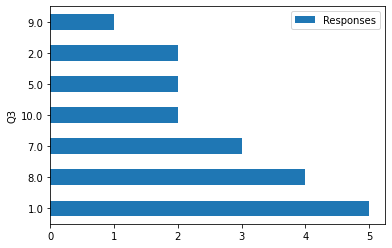

In [21]:
ax = val.plot.barh(x='Q3', y=['Responses'])

#**QUESTION 4**

In [22]:
val = generate([_df], 'background',['Q4'],['Responses'])
val

Successfully saved


,Q4,Responses
0,Yes,16
1,No,13


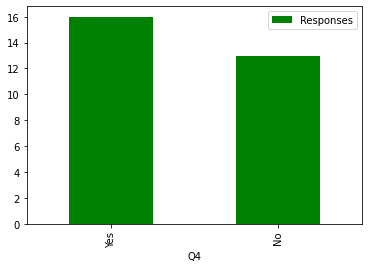

In [23]:
ax = val.plot.bar(x='Q4', y=['Responses'], color=['Green'])

#**QUESTION 5**

In [24]:
val = generate([_df], 'background',['Q5'],['Responses'])
val

Successfully saved


,Q5,Responses
0,Yes,18
1,No,11


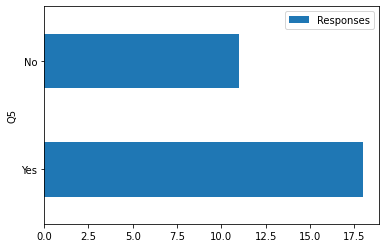

In [25]:
ax = val.plot.barh(x='Q5', y=['Responses'])

#**QUESTION 6**

In [26]:
val = generate([_df], 'background',['Q6'],['Responses'])
val

Successfully saved


,Q6,Responses
0,No,16
1,Yes,13


#**QUESTION 7**

In [27]:
val = generate([_df], 'background',['Q7'],['Responses'])
val

Successfully saved


,Q7,Responses
0,Useful,10
1,Very useful,5
2,Not really,2
3,Not useful,1


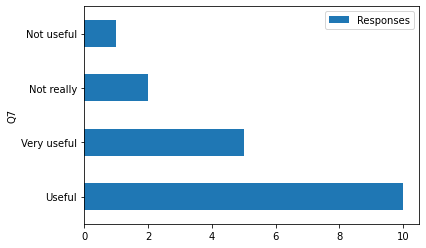

In [28]:
ax = val.plot.barh(x='Q7', y=['Responses'])

#**QUESTION 8**

In [29]:
val = generate([_df], 'background',['Q8'],['Responses'])
val

Successfully saved


,Q8,Responses
0,Capacity gap,22
1,Inadequate resources,22


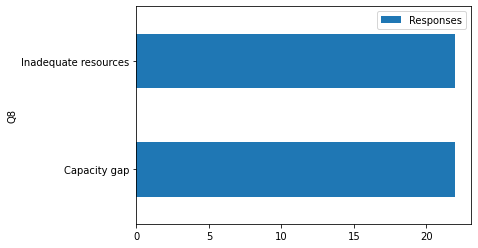

In [30]:
ax = val.plot.barh(x='Q8', y=['Responses'])

#**QUESTION 9**

In [31]:
val = generate([_df], 'background',['Q9'],['Responses'])
val

Successfully saved


,Q9,Responses
0,Equal opportunities,14
1,Decent work,7
2,Fair recruitment,2
3,Right to form or join associations,2
4,Fair wages,1
5,None,1
6,Campaign against child labour and servitude,1


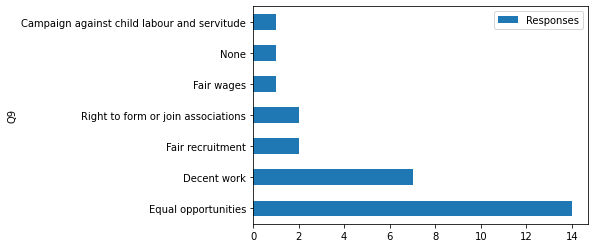

In [32]:
ax = val.plot.barh(x='Q9', y=['Responses'])

#**QUESTION 10**

In [33]:
val = generate([_df], 'background',['Q10'],['Responses'])
val

Successfully saved


,Q10,Responses
0,2021,10
1,Between 2020 – 2015,6
2,2022,3
3,None,2
4,2020,2
5,Never,1
6,Between 2014 – 2010,1
7,2017,1
8,not directly,1
9,9,1


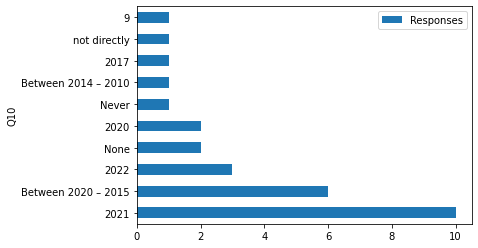

In [34]:
ax = val.plot.barh(x='Q10', y=['Responses'])

#**QUESTION 11**

In [35]:
val = generate([_df], 'background',['Q11'],['Responses'])
val

Successfully saved


,Q11,Responses
0,Yes,14
1,No,13


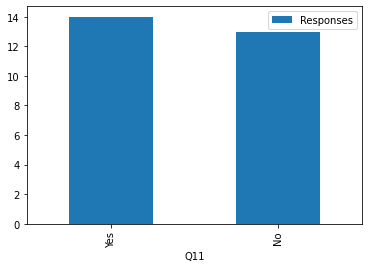

In [36]:
ax = val.plot.bar(x='Q11', y=['Responses'])

#**QUESTION 12**

In [37]:
val = generate([_df], 'background',['Q12'],['Responses'], transpose= False)
val

Successfully saved


,Q12,Responses
0,None,4
1,C143 - Migrant Workers (Supplementary Provisio...,1
2,Advocacy.,1
3,But our organisation is ready to implement the...,1
4,No,1
5,none,1
6,protection of migrants workers rights,1
7,Focus Group Discussion(FGD),1
8,Sensitisation and Media chats.,1
9,189.,1


#**QUESTION 13**

In [38]:
val = generate([_df], 'background',['Q13'],['Responses'], transpose= False)
val

Successfully saved


,Q13,Responses
0,None,6
1,National Policy on Labour Migration,1
2,National policy on labour migration 2014,1
3,NONE,1
4,Labour Law,1
5,Child protection policy,1
6,International convention on the protection of ...,1
7,Elimination of Child labor and Protection of C...,1
8,Capacity building for State and non State actors.,1
9,A desk office and help phone. Lines on report ...,1


#**QUESTION 14**

In [39]:
val = generate([_df], 'background',['Q14'],['Responses'], index=True, transpose= False)
val

Successfully saved


,Q14,Responses
0,Carry out advocacies,24
1,Capacity building of actors within the organiz...,23
2,Sensitization,22
3,Media engagement,19
4,build network,1
5,Focus Group Discussion,1


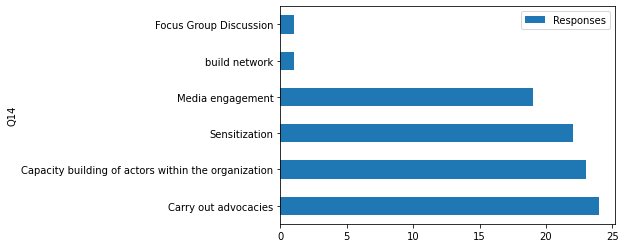

In [40]:
ax = val.plot.barh(x='Q14', y=['Responses'])

#**QUESTION 15**

In [41]:
val = generate([_df], 'background',['Q15'],['Responses'], transpose= False)
val

Successfully saved


,Q15,Responses
0,Not often,16
1,Often,8
2,Very often,3


#**QUESTION 16**

In [42]:
val = generate([_df], 'background',['Q16'],['Responses'], transpose= False)
val

Successfully saved


,Q16,Responses
0,No,13
1,Yes,12


#**QUESTION 17**

In [43]:
val = generate([_df], 'background',['Q17'],['Responses'], index=True, transpose= False)
val

Successfully saved


,Q17,Responses
0,None,2
1,Carried out media advocacy on the ill treatmen...,1
2,Reduction of Child Movement from Sokoto to Nig...,1
3,none,1
4,Awareness on gender equality policy in workplace,1
5,Established processes in which other relevant...,1
6,There is Commitment from stakeholders,1
7,was awareness creation.,1
8,The direct impact of advocacy activity carried...,1
9,Referral via networking with NACTAL Members,1


#**QUESTION 18**

In [44]:
val = generate([_df], 'background',['Q18'],['Responses'], index=True, transpose= False)
val

Successfully saved


,Q18,Responses
0,None,3
1,none,2
2,ILO Supported the Federal Government of Nigeri...,1
3,Many,1
4,The child right Act,1
5,They is a series of sensitization been carryou...,1
6,Working closely with Road Transport Workers ha...,1
7,National Migration Dialogue 2021,1
8,During a workshop on migration governance ther...,1
9,Advocacy,1


#**QUESTION 19**

In [45]:
val = generate([_df], 'background',['Q19'],['Responses'], transpose= False)
val

Successfully saved


,Q19,Responses
0,Inadequate resources,26
1,Capacity gap,22
2,Lack of interest,2
3,Have not joined the group,1
4,we will like to be part of it,1


#**QUESTION 20**

In [46]:
val = generate([_df], 'background',['Q20'],['Responses'], index=True, transpose= False)
val

Successfully saved


,Q20,Responses
0,Improving laws,1
1,Advocacy and Collaboration with Stakeholders,1
2,Sustained monitoring of recruitment agencies a...,1
3,workable recruitment policy and national recru...,1
4,Implementation of equal opportunity law\nGende...,1
5,Domestication and enforcement of the child rig...,1
6,Good Data capturing and Documentation,1
7,Advocacy visit and sensitization of both actor...,1
8,The need for adequate data on the unemployed.\...,1
9,Implement the national policy on labour migrat...,1


#**QUESTION 21**

In [47]:
val = generate([_df], 'background',['Q21'],['Responses'])
val

Successfully saved


,Q21,Responses
0,Protection of human rights of migrant workers,23
1,Advocacy strategies,23
2,Relevant national and international framework,21
3,Fair recruitment and the entire processes,19
4,Labour migration governance,18
5,Issues analysis,15
6,gender responsive migrants policies,1


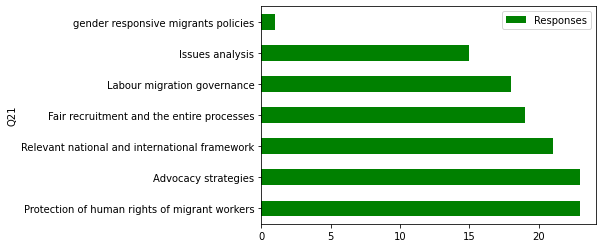

In [48]:
ax = val.plot.barh(x="Q21",color=['green'])

#**QUESTION 22**

In [49]:
val = generate([_df], 'background',['Q22'],['Responses'], index=False)
val

Successfully saved


,Responses
Q22,
Yes,14
Sometimes (Mixed),9
No,4


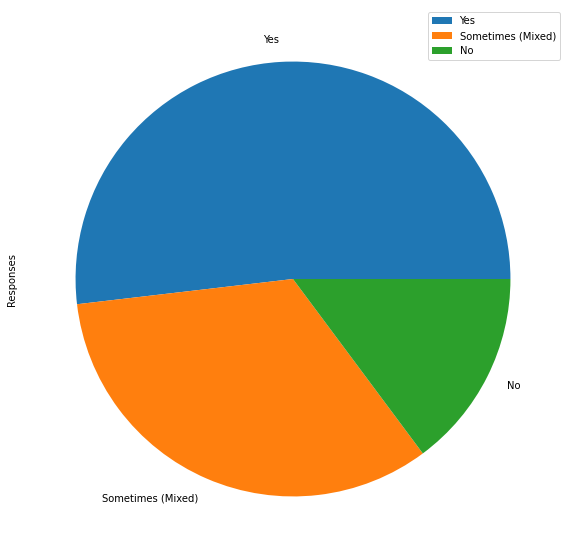

In [50]:
ax = val.plot.pie(x='Q22', y="Responses", figsize=(10, 10))

#**QUESTION 23**

In [51]:
val = generate([_df], 'background',['Q23'],['Responses'], transpose= False)
val

Successfully saved


,Q23,Responses
0,Capacity,1
1,No yet properly established synergy between bo...,1
2,Lack of awareness,1
3,lack of interest,1
4,corruption,1
5,narrow focused state actors,1
6,There has been a general lack of interest by t...,1
7,-,1
8,Don't know,1
9,Bearocracy,1


#**QUESTION 24**

In [52]:
val = generate([_df], 'background',['Q24'],['Responses'], transpose= False)
val

Successfully saved


,Q24,Responses
0,Employment rights and health rights,1
1,irregular migration,1
2,Assisting stranded migrants,1
3,Abuse of migrant workers rights,1
4,Social and Environment factor,1
5,Policy related factors,1
6,Economics factors,1
7,Don't know,1
8,Some times.,1
9,Policy implementation,1


#**QUESTION 25**

In [53]:
val = generate([_df], 'background',['Q25'],['Responses'], transpose= False)
val

Successfully saved


,Q25,Responses
0,Fair,12
1,Good,8
2,Poor,7
3,Very good,1


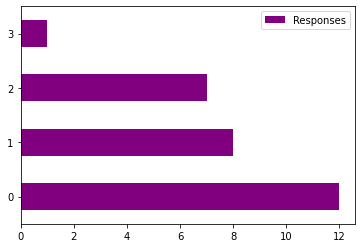

In [54]:
ax = val.plot.barh(color=['purple'])

#**QUESTION 26**

In [55]:
val = generate([_df], 'background',['Q26'],['Responses'], transpose= False)
val

Successfully saved


,Q26,Responses
0,Collaborate more with each other and other sta...,17
1,Provide more grassroots intervention,9
2,Be better organized,1


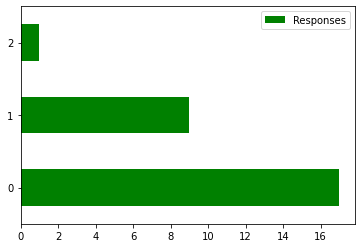

In [56]:
ax = val.plot.barh(color=['green'])